# Compare similaries between images

Needs modification. Don't run this notebook.

Given an image and optionally class label, we want to find if the state of action is start or end or middle.

Using CNN features.

In [1]:
import os
import os.path as osp
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import ceil

In [1]:
from WorkoutDetector.utils.common import *
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (5, 3)

In [3]:

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torchvision import models
from torchvision.io import read_image
from torch.utils.data import DataLoader, Dataset
import sklearn.metrics.pairwise as pw
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor
import PIL

## Repcount dataset

In [4]:
repcount = Repcount()
rand_anno = repcount.get_random_pose()
rand_path = repcount.get_video(rand_anno['frame_dir'])
print(rand_anno['total_frames'])
print(rand_path)

825
/home/umi/projects/WorkoutDetector/data/RepCount/videos/val/stu12_38.mp4


In [5]:
features = video_feature('resnet18', rand_path)

[ 24  47  47  72  72  98  98 122 122 146 146 169 169 193 194 216 216 239
 239 263 263 285 285 310 310 333 333 356 356 380 380 404 404 429 429 453
 453 477 477 501 501 524 524 550 550 573 573 596 596 620 621 645 645 668
 668 693 693 719 719 743 743 769 769 790 790 815]
torch.Size([825, 512])


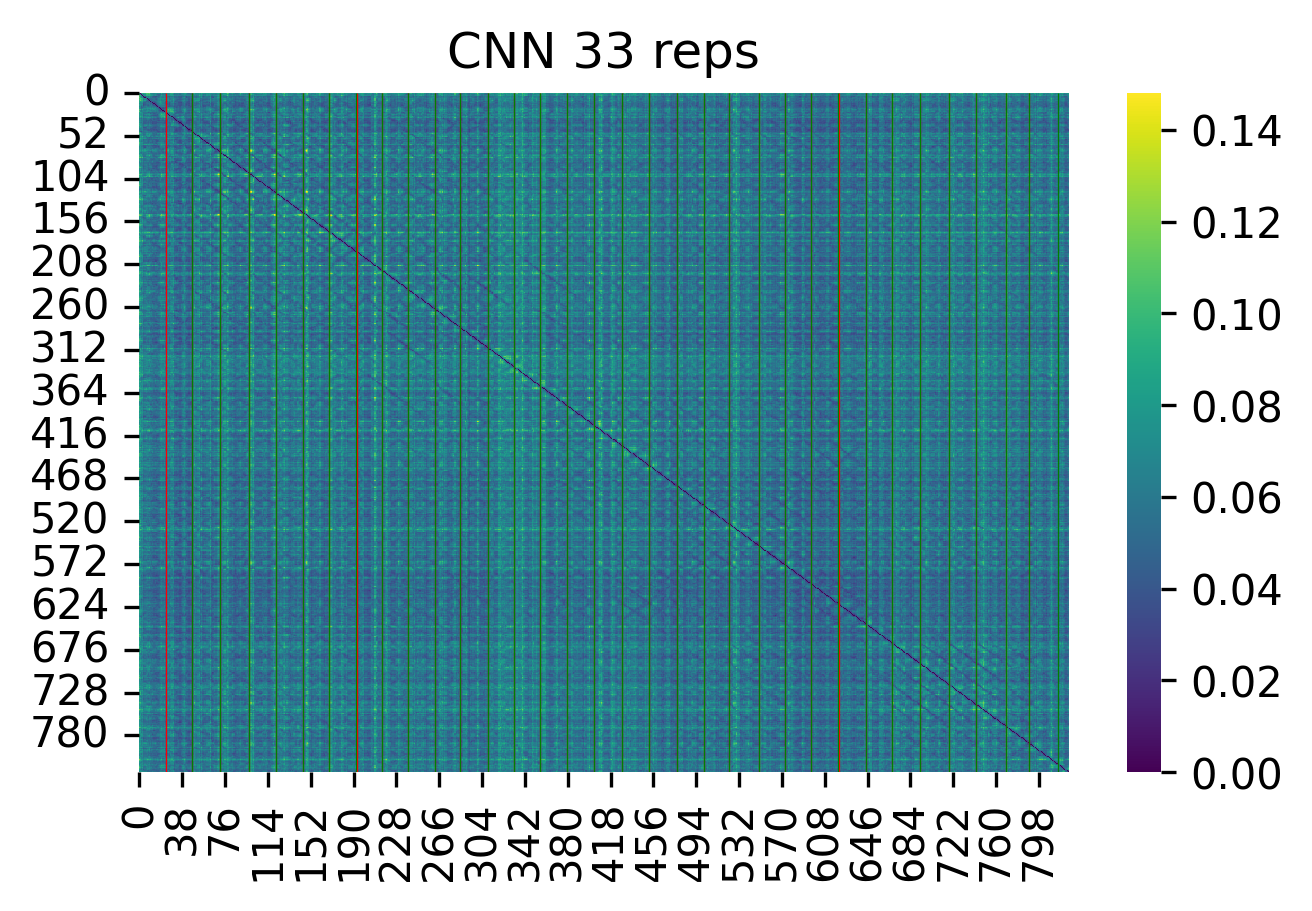

In [6]:
reps = rand_anno['reps']
print(reps)
print(features.shape)
plot_sim(features, rand_anno['count'], reps)

## Find peek states in video

Check whether the middle frames looks like a peek.

In [69]:
rand_anno = repcount.get_random_pose()
rand_path = repcount.get_video(rand_anno['frame_dir'])
print(rand_anno['total_frames'])
print(rand_path)
print(rand_anno['reps'])

1799
/home/umi/projects/WorkoutDetector/data/RepCount/videos/val/stu2_56.mp4
[  68  151  151  237  237  319  319  398  398  485  485  578  578  657
  657  743  743  833  834  918  918 1005 1005 1089 1089 1173 1173 1259
 1259 1344 1344 1427 1427 1508 1509 1590 1590 1671]


In [70]:
reps = rand_anno['reps']
cap = cv2.VideoCapture(rand_path)
ret, frame = cap.read()
frames = []
while ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(PIL.Image.fromarray(frame))
    ret, frame = cap.read()

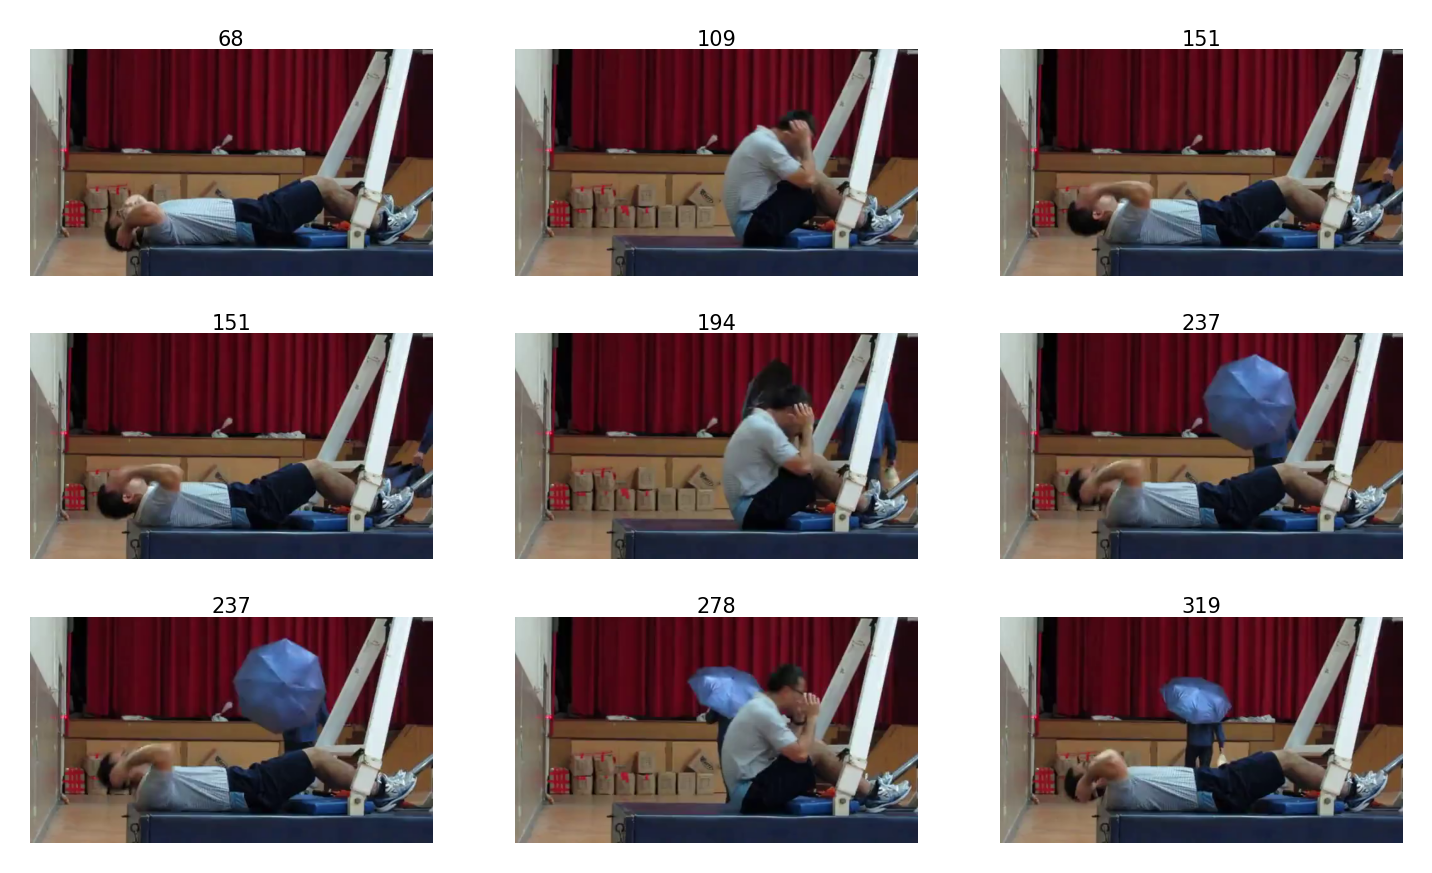

In [73]:
imgs_idx = []
for i in range(0, min(6,len(reps)), 2):
    imgs_idx.append(reps[i])
    imgs_idx.append((reps[i] + reps[i+1]) // 2)
    imgs_idx.append(reps[i+1])

fig, ax = plt.subplots(len(imgs_idx)//3, 3)
for i in range(len(imgs_idx)//3):
    for j in range(3):
        frame_idx = imgs_idx[i*3+j]
        ax[i, j].imshow(frames[frame_idx])
        ax[i, j].axis('off')
        ax[i, j].set_title(str(frame_idx), pad=0.1, fontsize=5)
fig.tight_layout()
plt.show()

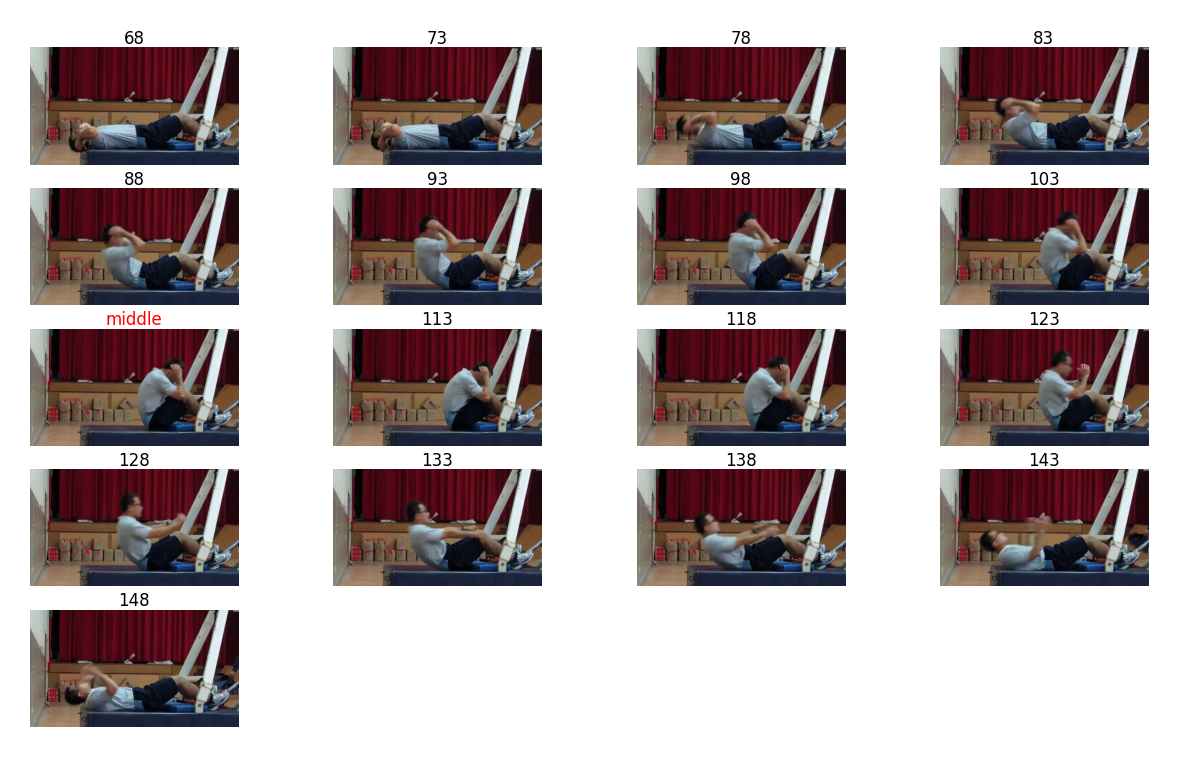

In [75]:
step = 5
rep_idx = 0
one_rep = [i for i in range(reps[rep_idx*2], reps[rep_idx*2+1], step)]
num_col = 4
fig, ax = plt.subplots(ceil(len(one_rep)/num_col), num_col)
for i in range(ceil(len(one_rep)/num_col)):
    for j in range(num_col):
        if i*num_col+j >= len(one_rep):
            ax[i, j].axis('off')
            continue
        frame_idx = one_rep[i*num_col+j]
        ax[i, j].imshow(frames[frame_idx])
        ax[i, j].set_title(str(frame_idx), fontsize=4, pad=0.1)
        ax[i, j].axis('off')
        if i*num_col+j == len(one_rep)//2:
            ax[i, j].set_title('middle', fontsize=4, pad=0.1, color='r')
plt.show()

## Countix dataset

In [42]:
countix = Countix()
countix_anno = countix.get_random_pose()
countix_path = countix.get_video(countix_anno['frame_dir'])
print(countix_anno['total_frames'])
print(countix_path)

300
/home/umi/projects/WorkoutDetector/data/Countix/videos/train/MKni-WE_EJA.mp4


In [43]:
features = video_feature('resnet18', countix_path)

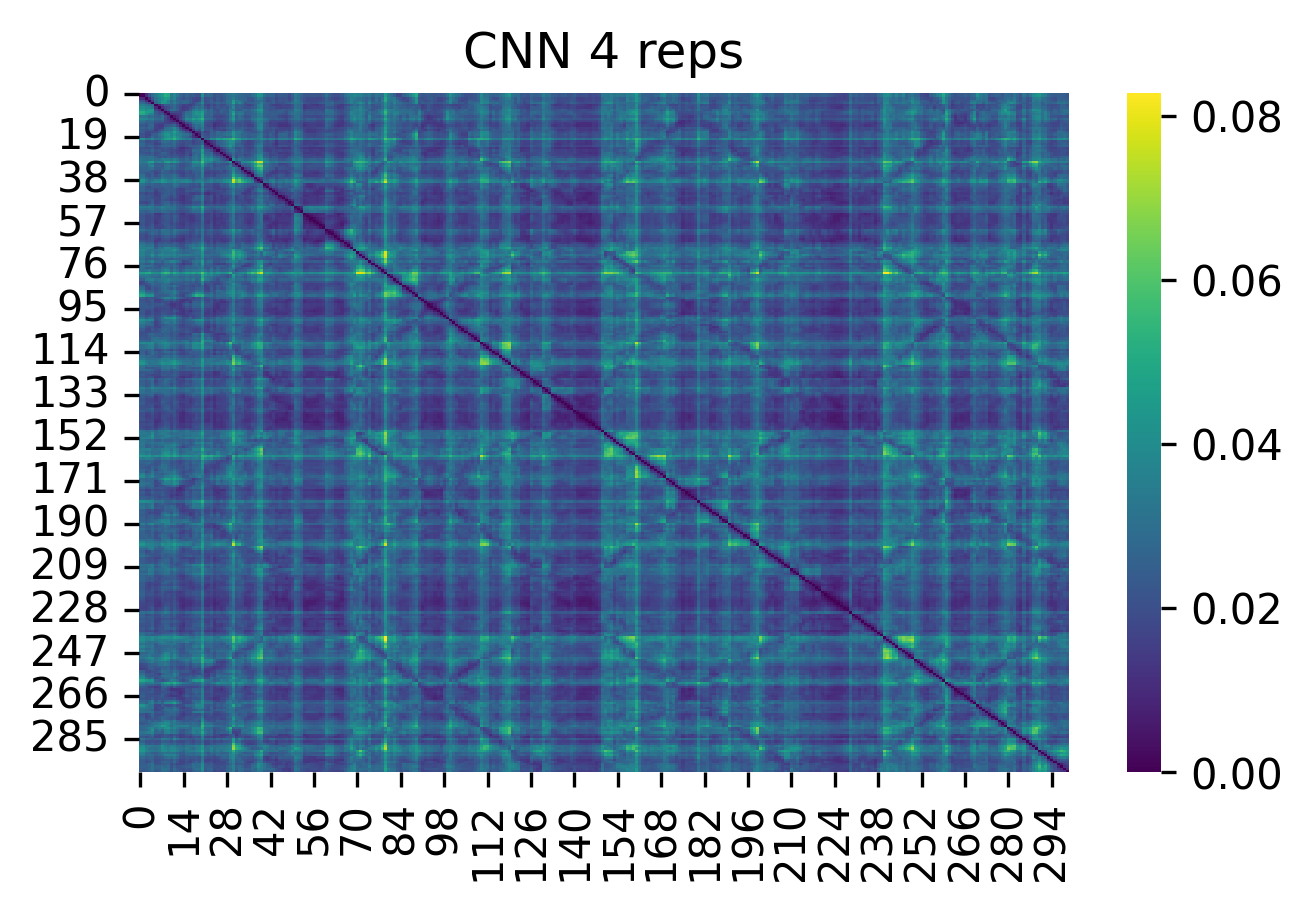

In [44]:
plot_sim(features, countix_anno['count'])

# Vector search

KNN, FAISS, ANNOY

In [9]:
vid = rand_path
print(vid, features.shape, reps)

/home/umi/projects/WorkoutDetector/data/RepCount/videos/val/stu12_38.mp4 torch.Size([825, 512]) [ 24  47  47  72  72  98  98 122 122 146 146 169 169 193 194 216 216 239
 239 263 263 285 285 310 310 333 333 356 356 380 380 404 404 429 429 453
 453 477 477 501 501 524 524 550 550 573 573 596 596 620 621 645 645 668
 668 693 693 719 719 743 743 769 769 790 790 815]
